In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
os.getcwd()

'C:\\Users\\LEGION\\Desktop\\data_set'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'hypothesis_tests.ipynb',
 'insurance.csv',
 'insuran_analysis.ipynb',
 'titanic test.csv',
 'titanic_train.csv',
 'Untitled.ipynb']

In [2]:
titanic = pd.read_csv('titanic test.csv')

In [3]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
nn_df = titanic.select_dtypes(exclude = np.number)
nn_df.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [12]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Tests
- one continous
- one categorical
- two categorical
- two continous
- one continous one categorical(t-test)
- one continous one categorical(Annova)

### One continuous
For One continuous variable, Type of test depend on sample size,if sample size is greater than 30 than Z-test (Gaussian distribution) is used else T-test (t-distribution).

In [33]:
print('Mean Fare of the sample of ship is {}'.format(np.nanmean(titanic['Fare'])))

Mean Fare of the sample of ship is 35.57653540669856


In [16]:
np.median(titanic['Fare'])

14.4542

In [34]:
print('Median of the sample is {}'.format(np.nanmedian(titanic['Fare'])))

Median of the sample is 14.4542


In [18]:
titanic['Fare'].fillna(np.nanmedian(titanic['Fare']),inplace =True)
titanic['Fare'].isnull().sum()

0

Above code check number of null values

<AxesSubplot:xlabel='Fare', ylabel='Density'>

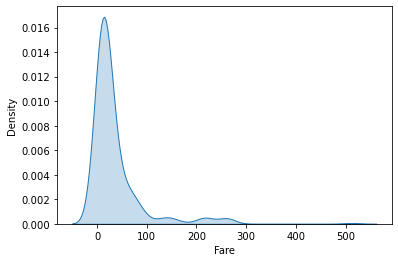

In [13]:
sns.kdeplot(x = titanic.Fare,fill =True)

Find the interval of population given aplha = 0.05

#### Method 1 (manual)

In [4]:
print('Number of elements in Fare field {}'.format(len(titanic.Fare)))

Number of elements in Fare field 418


In [19]:
t = stats.t.ppf(q=0.975,df = 417)
print('t statistic value {}'.format(t))
std = np.std(titanic.Fare)
print('standard of deviation of sample {}'.format(std))
sqrt = np.sqrt(len(titanic.Fare))
print('square root of sample size {}'.format(sqrt))

t statistic value 1.965669151283938
standard of deviation of sample 55.783256347325455
square root of sample size 20.445048300260872


In [22]:
tuples = (np.mean(titanic.Fare)-(t*std/sqrt),np.mean(titanic.Fare)+(t*std/sqrt))
print('Result of t-test {}'.format(tuples))

Result of t-test (30.213308842019668, 40.93976197137739)


The above interval states that there is 95% chance that the average fare of ship lie in this interval 

#### Method 2 (using library)

In [14]:
interval= stats.t.interval(0.95,df = 417,loc = titanic.Fare.mean(),scale = std/sqrt)
print('Result of t-test {}'.format(interval))

Result of t-test (30.207805160974964, 40.9452656524221)


In [15]:
interval_z = stats.norm.interval(0.95,loc = titanic.Fare.mean(),scale = std/sqrt)
print('Result of z-test {}'.format(interval_z))

Result of z-test (30.223387387126696, 40.92968342627037)


As you can see answers are more too close since after the sample size greater than 30 (418 in this case) sample starts to beome more and more represntative of normal distribution.

### one categorical

Our question is whether there is difference in proportion of male and female died in the accident.

To answer this question for categorical variables we use chi squared test.(one sample proportion test can be used too)

<AxesSubplot:>

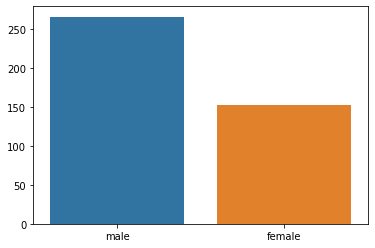

In [19]:
sns.barplot(x=titanic.Sex.value_counts().index,y=titanic.Sex.value_counts().values)

Above difference in propotion are just the difference in proportion of sample and not the population.

H0 : There is no difference due to categories

H1 : There is a difference due to categories


The test Used here is Chi-squared test

In [20]:
stats.chisquare(f_obs = titanic.Sex.value_counts())

Power_divergenceResult(statistic=31.09090909090909, pvalue=2.4622186759083766e-08)

Above are the calculated test statistics calulated. P-value indicates the liklihood of alternate hypothesis being true considering null hypothesis being true.

Since our P-value is greater than therefore we accept null hypothesis.

In [21]:
crit_statistic = stats.chi2.ppf(q=0.95,df=1)
print('crtical test staistics {}'.format(crit_statistic))

crtical test staistics 3.841458820694124


#### Typical Chi-Square distribution for 1 dof

(0.0, 11.71822390691517)

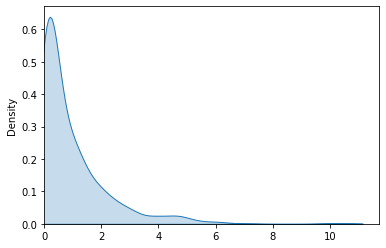

In [22]:
x=stats.chi2.rvs(size = 1000,df = 1)
pl = sns.kdeplot(x=x,fill = True,cut = True)
pl.set_xlim(left =0)

Critical statistic of 3.84 is much less than calculated 31.09 and thus we reject null hypothesis

### Two categorical variable

H0 : There is no relationship b/w the Pclass and Sex

H1 : There is a relationship b/w the Pclass and sex

In this case Chi-squared test of independence is used. It test whether two categorical variable are independent.

In [24]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Passenger class here is taken as category

In [25]:
titanic.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [26]:
titanic.Pclass = pd.Categorical(titanic.Pclass)

In [27]:
titanic['Pclass'] = titanic['Pclass'].cat.rename_categories(['A','B','C'])
frq_tble = pd.crosstab(index =titanic.Sex,columns = titanic.Pclass)
frq_tble

Pclass,A,B,C
Sex,,,
female,50,30,72
male,57,63,146


 #### Method 1 Using scipy.stats library

In [28]:
observed = frq_tble.values

In [30]:
val = stats.chi2_contingency(frq_tble)
val

(6.693869422819262,
 0.03519206276590605,
 2,
 array([[ 38.90909091,  33.81818182,  79.27272727],
        [ 68.09090909,  59.18181818, 138.72727273]]))

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

Since pvalue is less than 0.05 therefore we reject null hypothesis.
Therefore is a relationship b/w Pclass and sex for the population.

In [29]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Sex'>

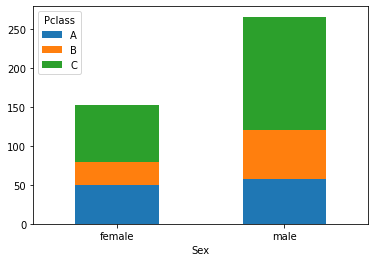

In [30]:
frq_tble.plot(kind = 'bar',stacked = True,rot = 0)

### Two continous

In [37]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Age and Fare are two choosen continous variable.

For two continous variable correlation is used to find the relation b/w variables.

Positive correlation implies that as one variable increases other increases too.

Negative correlation implies that as one variable increases other decreases

#### Method 1 (using pandas)

In [38]:
titanic[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.332709
Fare,0.332709,1.000000


Low Positive correlation is visible in below graph.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

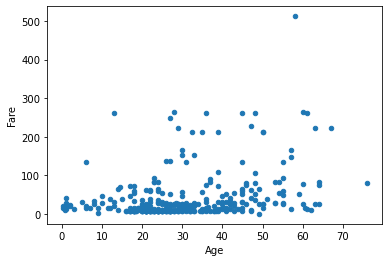

In [39]:
titanic.plot(kind='scatter',x='Age',y='Fare')

#### Method 2 (using numpy)

In [40]:
np.corrcoef(titanic['Age'],titanic['Fare'])

array([[nan, nan],
       [nan,  1.]])

In [41]:
c = titanic.Age.fillna(np.mean(titanic.Age))
np.corrcoef(titanic.Fare,c)

array([[1.        , 0.32456842],
       [0.32456842, 1.        ]])

### one continous and one categorical (Two - sample t-test)

In [42]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Fare choosen as continous variable and sex is choosen as categorical variable. 

Now since sex has only two categories therefeore we can use two sample t-test

In [43]:
cat_cont = titanic[['Fare','Sex']]
cat_cont 

,Fare,Sex
0,7.8292,male
1,7.0000,female
2,9.6875,male
3,8.6625,male
4,12.2875,female
...,...,...
413,8.0500,male
414,108.9000,female
415,7.2500,male
416,8.0500,male


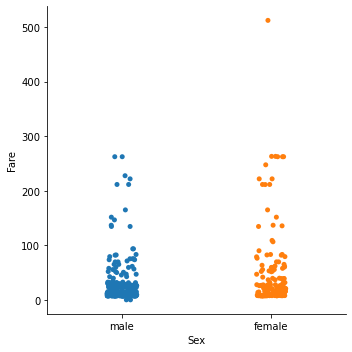

In [37]:
sns.catplot(x='Sex',y='Fare',data = cat_con)

#### Method 1 using scipy library

H0 : (mean)MALE = (mean)FEMALE

H1 : (mean)MALE != (mean)FEMALE

In [46]:
male_fare= cat_cont[cat_cont.Sex == 'male'].Fare
female_fare = cat_cont[cat_cont.Sex == 'female'].Fare

In [47]:
stats.ttest_ind(a= male_fare, b= female_fare,equal_var = False)

Ttest_indResult(statistic=-3.4573877036507663, pvalue=0.0006622966209586439)

Pvalue is much less than significance level therefore we reject null and accept alternate hypothesis. 

which implies there is difference due categories
even in the population

Or We can say that there is difference in fare based on categories.

#### Theoritical Method

In [49]:
male_fare = cat_cont[cat_cont.Sex == 'male'].Fare
number_of_male = len(male_fare)
female_fare = cat_cont[cat_cont.Sex == 'female'].Fare
number_of_female = len(female_fare)
print("Number of male {}".format(number_of_male))
print("Number of female {}".format(number_of_female))

Number of male 266
Number of female 152


In [ ]:
# x = male
# y = female
#x1 = male fare
# y1 = female fare

In [51]:
male_fare_mean = male_fare.mean()
female_fare_mwan = female_fare.mean()
sqrt = np.sqrt((np.var(male_fare)/number_of_male) + (np.var(female_fare)/number_of_female))

In [53]:
t = (male_fare_mean - female_fare_mwan)/sqrt
print('calulated test staistic is {}'.format(t))

calulated test staistic is -3.4680671459410393


In [55]:
pvalue_cal = stats.t.cdf(x=t,df =number_of_female-1 )*2
print('p value is {}'.format(pvalue_cal))

p value is 0.000683172711515983


df is smaller sample size subtacted by 1 

### ANNOVA

In [58]:
cat3_n_cont = titanic[['Fare','Pclass']]
cat3_n_cont

,Fare,Pclass
0,7.8292,C
1,7.0000,C
2,9.6875,B
3,8.6625,C
4,12.2875,C
...,...,...
413,8.0500,C
414,108.9000,A
415,7.2500,C
416,8.0500,C


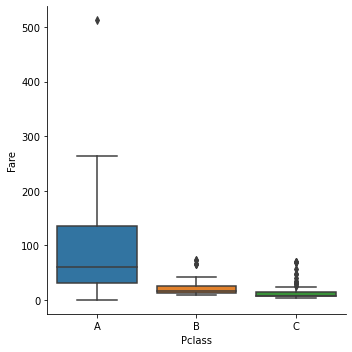

In [45]:
sns.catplot(data = cat3_n_cont,x='Pclass',y = 'Fare',kind = 'box')

In [62]:
groups_ind = cat3_n_cont.groupby('Pclass').groups
catA = cat3_n_cont['Fare'].iloc[groups_ind['A']]
catB = cat3_n_cont['Fare'].iloc[groups_ind['B']]
catC = cat3_n_cont['Fare'].iloc[groups_ind['C']]

In [47]:
stats.f_oneway(catA,catB,catC)

F_onewayResult(statistic=130.32013425445123, pvalue=1.19952265501301e-44)

P value is too low indicating that are we should reject null hypothesis and therefore have to accept alternate hyothesis.

Indicating that there is difference b/w means of each group

[Text(0.5, 1.0, 'C')]

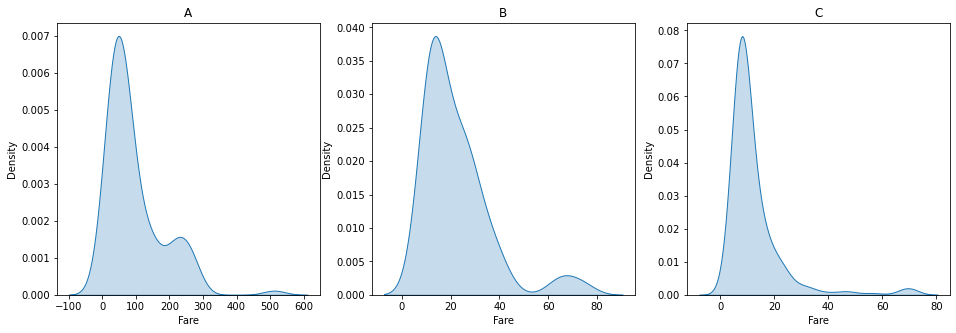

In [69]:
fig,ax = plt.subplots(1,3,figsize = (16,5))
sns.kdeplot(x = catA,ax =ax[0],fill =True).set(title='A')
sns.kdeplot(x = catB,ax =ax[1],fill =True).set(title='B')
sns.kdeplot(x = catC,ax =ax[2],fill = True).set(title='C')

lets check which category caused this variation.

In [49]:
categories = ['A','B','C']
pairs = []

for i in range(2):
    for k in range(i+1,3):
        pairs.append((categories[i],categories[k]))

for p1,p2 in pairs:
    print(p1,p2)
    print(stats.ttest_ind(cat3_n_cont['Fare'].iloc[groups_ind[p1]],cat3_n_cont['Fare'].iloc[groups_ind[p2]]))

A B
Ttest_indResult(statistic=8.133180619559417, pvalue=4.511428412153624e-14)
A C
Ttest_indResult(statistic=14.09570903318974, pvalue=1.693147914876138e-35)
B C
Ttest_indResult(statistic=6.644352200466072, pvalue=1.3747778950099317e-10)


Pairwise two sample t-test suggest that each and every category are different from each other, Which we can clearly see in above plotted kde 

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-72.0782,0.0,-86.7094,-57.4469,True
A,C,-81.8115,0.0,-93.9935,-69.6294,True
B,C,-9.7333,0.1738,-22.5156,3.0491,False


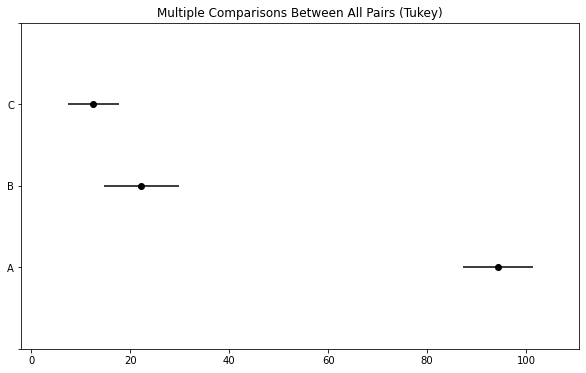

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog =cat3_n_cont['Fare'], groups = cat3_n_cont['Pclass'],alpha =0.05 )
tukey.plot_simultaneous()

tukey.summary()

Above we can clearly see that each test involving A show that we should reject the null hypothesis. This suggest that A category is likely different from the other two.